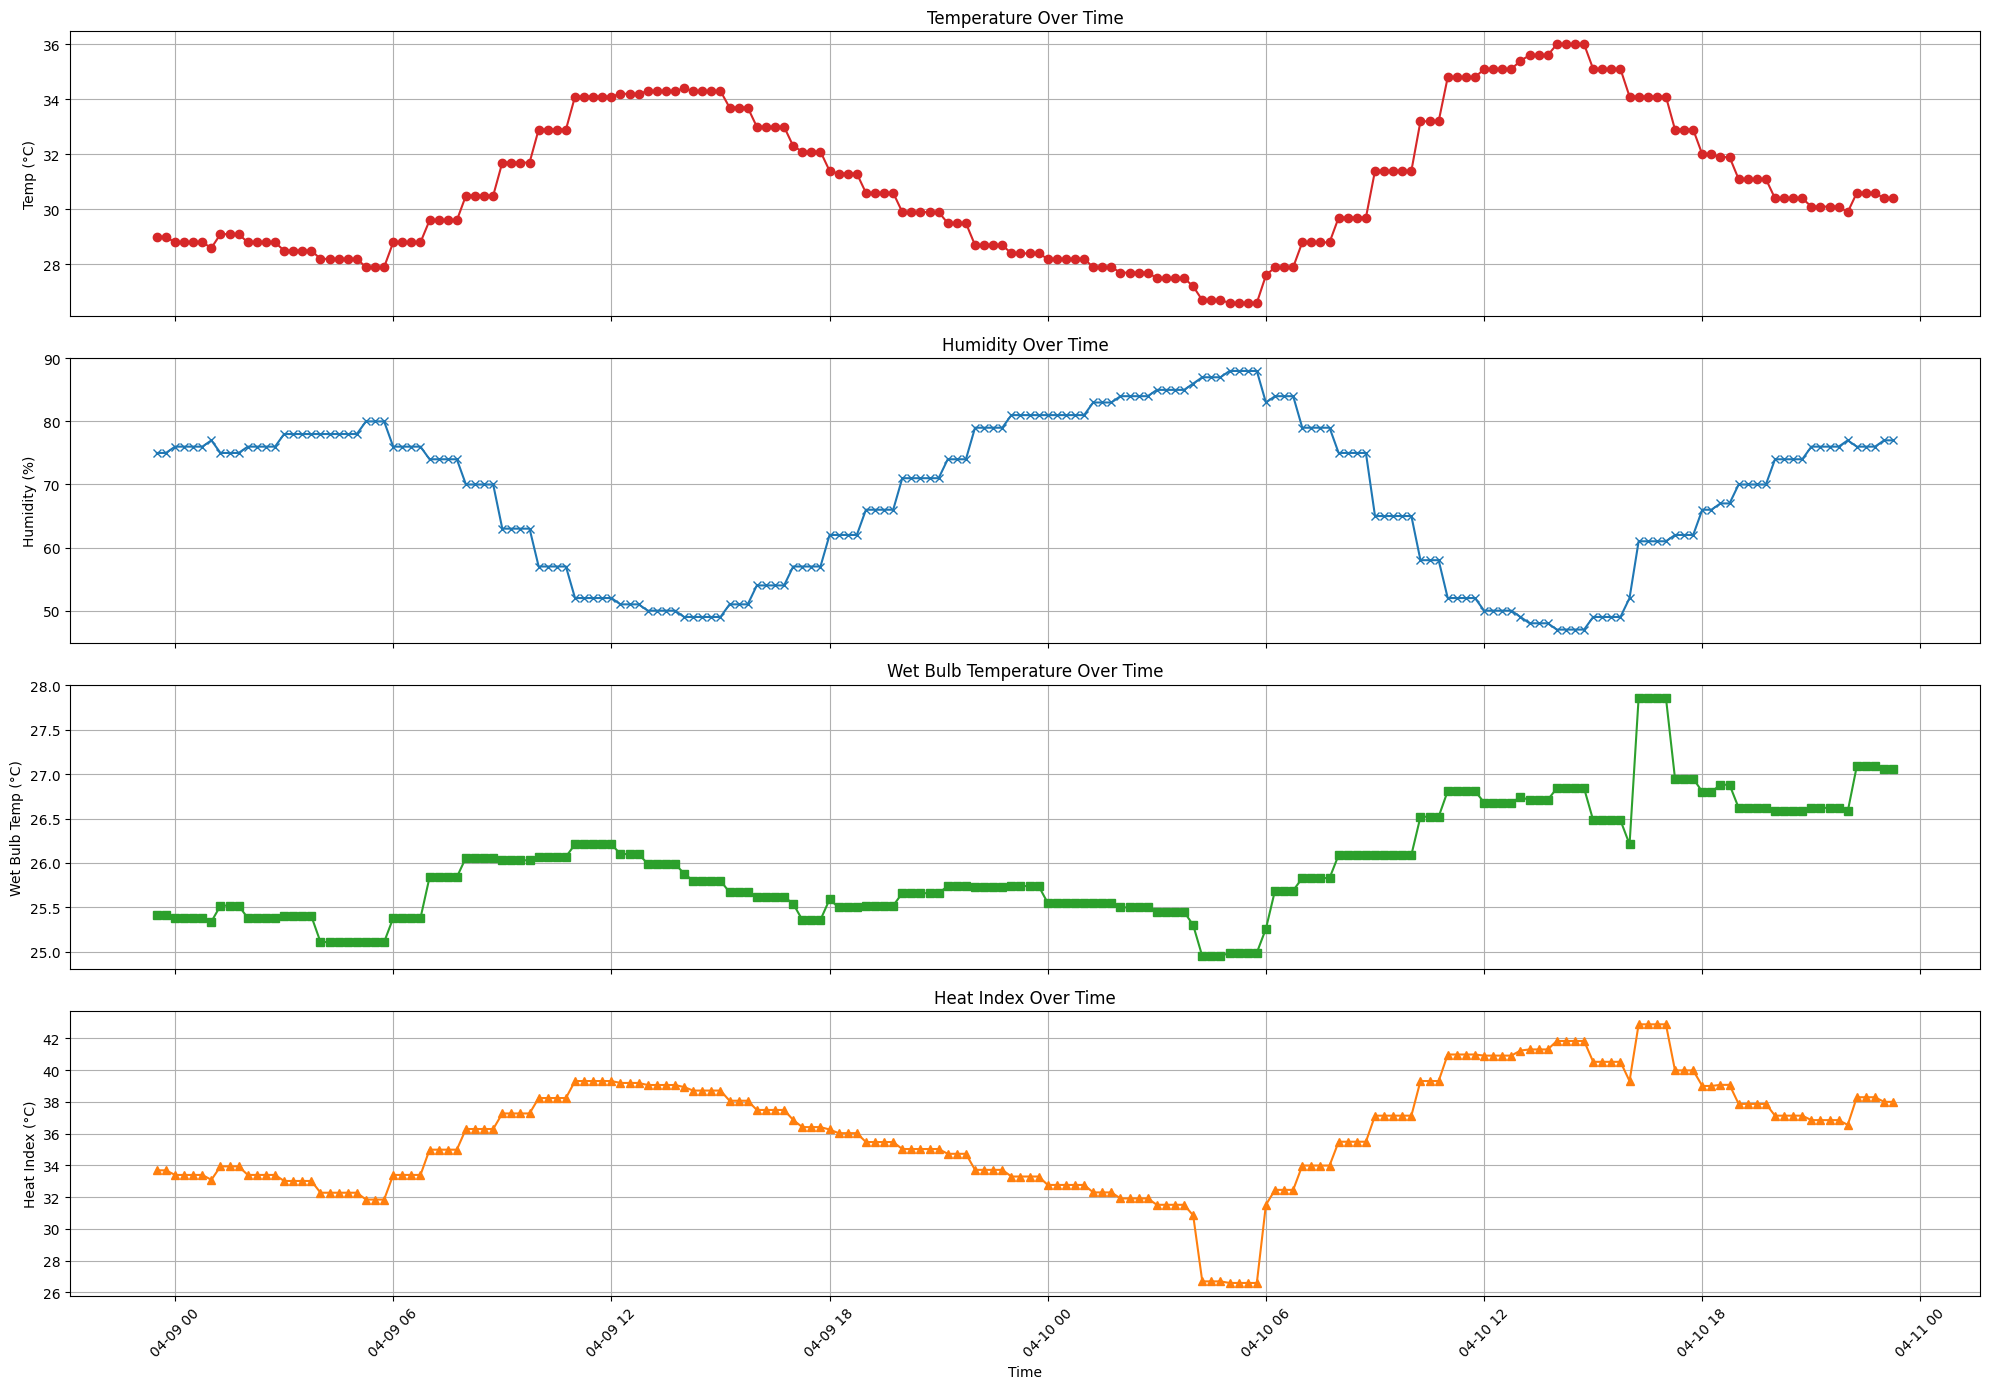

In [29]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import math


BASE_URL = "https://api.weatherbit.io/v2.0/history/subhourly?"
API_KEY = "0e295f6835be4ff8a4331ce0bb858583"

lat = 13.0843
lon = 80.2705
start_date = "2025-04-9"
end_date = "2025-04-11"

# Construct API URL
url = f"{BASE_URL}lat={lat}&lon={lon}&start_date={start_date}&end_date={end_date}&tz=local&key={API_KEY}"


def wet_bulb_temp(T, RH):
    return round(
        T * math.atan(0.151977 * (RH + 8.313659) ** 0.5) +
        math.atan(T + RH) -
        math.atan(RH - 1.676331) +
        0.00391838 * RH ** 1.5 * math.atan(0.023101 * RH) -
        4.686035,
        2
    )

def heat_index(T, RH):
    if T < 27 or RH < 40:
        return T
    c1 = -8.78469475556
    c2 = 1.61139411
    c3 = 2.33854883889
    c4 = -0.14611605
    c5 = -0.012308094
    c6 = -0.0164248277778
    c7 = 0.002211732
    c8 = 0.00072546
    c9 = -0.000003582
    return round(
        c1 + c2 * T + c3 * RH + c4 * T * RH + c5 * T ** 2 +
        c6 * RH ** 2 + c7 * T ** 2 * RH + c8 * T * RH ** 2 +
        c9 * T ** 2 * RH ** 2,
        2
    )


response = requests.get(url)

if response.status_code == 200:
    data = response.json().get('data', [])
    
    if not data:
        print("No data returned.")
    else:
       
        timestamps, temps, hums, wbt_list, hi_list = [], [], [], [], []

        for entry in data:
            ts = datetime.strptime(entry['timestamp_local'], "%Y-%m-%dT%H:%M:%S")
            temp = entry.get('temp')
            humidity = entry.get('rh')

            wb = wet_bulb_temp(temp, humidity)
            hi = heat_index(temp, humidity)

            timestamps.append(ts)
            temps.append(temp)
            hums.append(humidity)
            wbt_list.append(wb)
            hi_list.append(hi)

       
        fig, axs = plt.subplots(4, 1, figsize=(20, 14), sharex=True)

        axs[0].plot(timestamps, temps, color='tab:red', marker='o')
        axs[0].set_ylabel("Temp (°C)")
        axs[0].set_title("Temperature Over Time")
        axs[0].grid(True)

        axs[1].plot(timestamps, hums, color='tab:blue', marker='x')
        axs[1].set_ylabel("Humidity (%)")
        axs[1].set_title("Humidity Over Time")
        axs[1].grid(True)

        axs[2].plot(timestamps, wbt_list, color='tab:green', marker='s')
        axs[2].set_ylabel("Wet Bulb Temp (°C)")
        axs[2].set_title("Wet Bulb Temperature Over Time")
        axs[2].grid(True)

        axs[3].plot(timestamps, hi_list, color='tab:orange', marker='^')
        axs[3].set_ylabel("Heat Index (°C)")
        axs[3].set_title("Heat Index Over Time")
        axs[3].set_xlabel("Time")
        axs[3].grid(True)

        # Rotate x-axis ticks
        for ax in axs:
            for label in ax.get_xticklabels():
                label.set_rotation(45)

        plt.tight_layout()
        plt.show()

else:
    print(f"Error fetching data. Status code: {response.status_code}")


In [30]:
print(f"{'Timestamp':<20} | {'Temp (°C)':<10} | {'Humidity (%)':<13} | {'Wet Bulb (°C)':<15} | {'Heat Index (°C)':<17}")
print("-" * 85)

for ts, t, h, wbt, hi in zip(timestamps, temps, hums, wbt_list, hi_list):
    print(f"{ts.strftime('%Y-%m-%d %H:%M'):<20} | {t:<10.1f} | {h:<13.1f} | {wbt:<15.1f} | {hi:<17.1f}")


Timestamp            | Temp (°C)  | Humidity (%)  | Wet Bulb (°C)   | Heat Index (°C)  
-------------------------------------------------------------------------------------
2025-04-08 23:30     | 29.0       | 75.0          | 25.4            | 33.7             
2025-04-08 23:45     | 29.0       | 75.0          | 25.4            | 33.7             
2025-04-09 00:00     | 28.8       | 76.0          | 25.4            | 33.4             
2025-04-09 00:15     | 28.8       | 76.0          | 25.4            | 33.4             
2025-04-09 00:30     | 28.8       | 76.0          | 25.4            | 33.4             
2025-04-09 00:45     | 28.8       | 76.0          | 25.4            | 33.4             
2025-04-09 01:00     | 28.6       | 77.0          | 25.3            | 33.1             
2025-04-09 01:15     | 29.1       | 75.0          | 25.5            | 33.9             
2025-04-09 01:30     | 29.1       | 75.0          | 25.5            | 33.9             
2025-04-09 01:45     | 29.1       